In [1]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'C:\\Users\\tkim29\\assist_python\\recomm._sys'

In [2]:
'''
order_data	주문일자
FC_code	프랜차이져 코드
FC_name	프랜차이져 이름
ST_code	점포코드
ct_L_code	상품 대분류 그룹 코드
ct_L_name	상품 대분류 그룹 이름
ct_M_code	상품 중분류 그룹 코드
ct_M_name	상품 중분류 그룹 이름
ct_S_code	상품 소분류 그룹 코드
ct_S_name	상품 소분류 그룹 이름
sku_code	상품명
qty	주문 수량
std	주문 단위
'''

'\norder_data\t주문일자\nFC_code\t프랜차이져 코드\nFC_name\t프랜차이져 이름\nST_code\t점포코드\nct_L_code\t상품 대분류 그룹 코드\nct_L_name\t상품 대분류 그룹 이름\nct_M_code\t상품 중분류 그룹 코드\nct_M_name\t상품 중분류 그룹 이름\nct_S_code\t상품 소분류 그룹 코드\nct_S_name\t상품 소분류 그룹 이름\nsku_code\t상품명\nqty\t주문 수량\nstd\t주문 단위\n'

In [3]:
data = pd.read_excel("C:\\Users\\tkim29\\assist_python\\recomm._sys\\python_hw_data.xlsx", 
                     parse_dates= ["order_data"], encoding = 'utf-8')

In [4]:
data.head()

,order_data,FC_code,FC_name,ST_code,ct_L_code,ct_L_name,ct_M_code,ct_M_name,ct_S_code,ct_S_name,sku_code,qty,std
0,2018-12-07,10241,café_37,16444,10,가공식품,15,조미식품,11,조미료,120165,5.0,BOX
1,2018-12-07,10241,café_37,16444,10,가공식품,10,유가공품,13,치즈류,100323,1.0,EA
2,2018-12-07,10241,café_37,16444,10,가공식품,19,캔/김치/편의식/기타,10,캔제품,100479,24.0,EA
3,2018-12-07,10241,café_37,16444,10,가공식품,13,분말가공,12,곡물가공기타,104176,12.0,EA
4,2018-12-07,10241,café_37,16444,10,가공식품,19,캔/김치/편의식/기타,13,가공식품기타,119183,4.0,EA


In [5]:
data.dtypes

order_data    datetime64[ns]
FC_code                int64
FC_name               object
ST_code                int64
ct_L_code              int64
ct_L_name             object
ct_M_code              int64
ct_M_name             object
ct_S_code              int64
ct_S_name             object
sku_code               int64
qty                  float64
std                   object
dtype: object

## Preprocessing

In [6]:
data["datetime-year"] = data["order_data"].dt.year
data["datetime-month"] = data["order_data"].dt.month
data["datetime-day"] = data["order_data"].dt.day
data["datetime-dayofweek"] = data["order_data"].dt.dayofweek

In [7]:
data.head()

,order_data,FC_code,FC_name,ST_code,ct_L_code,ct_L_name,ct_M_code,ct_M_name,ct_S_code,ct_S_name,sku_code,qty,std,datetime-year,datetime-month,datetime-day,datetime-dayofweek
0,2018-12-07,10241,café_37,16444,10,가공식품,15,조미식품,11,조미료,120165,5.0,BOX,2018,12,7,4
1,2018-12-07,10241,café_37,16444,10,가공식품,10,유가공품,13,치즈류,100323,1.0,EA,2018,12,7,4
2,2018-12-07,10241,café_37,16444,10,가공식품,19,캔/김치/편의식/기타,10,캔제품,100479,24.0,EA,2018,12,7,4
3,2018-12-07,10241,café_37,16444,10,가공식품,13,분말가공,12,곡물가공기타,104176,12.0,EA,2018,12,7,4
4,2018-12-07,10241,café_37,16444,10,가공식품,19,캔/김치/편의식/기타,13,가공식품기타,119183,4.0,EA,2018,12,7,4


In [8]:
print(data.shape)

(262994, 17)


In [9]:
data[["order_data", "datetime-year", "datetime-month", "datetime-day", "datetime-dayofweek"]].head()

,order_data,datetime-year,datetime-month,datetime-day,datetime-dayofweek
0,2018-12-07,2018,12,7,4
1,2018-12-07,2018,12,7,4
2,2018-12-07,2018,12,7,4
3,2018-12-07,2018,12,7,4
4,2018-12-07,2018,12,7,4


In [10]:
data.loc[data["datetime-dayofweek"] == 0, "datetime-dayofweek(humanized)"] = "Monday"
data.loc[data["datetime-dayofweek"] == 1, "datetime-dayofweek(humanized)"] = "Tuesday"
data.loc[data["datetime-dayofweek"] == 2, "datetime-dayofweek(humanized)"] = "Wednesday"
data.loc[data["datetime-dayofweek"] == 3, "datetime-dayofweek(humanized)"] = "Thursday"
data.loc[data["datetime-dayofweek"] == 4, "datetime-dayofweek(humanized)"] = "Friday"
data.loc[data["datetime-dayofweek"] == 5, "datetime-dayofweek(humanized)"] = "Saturday"
data.loc[data["datetime-dayofweek"] == 6, "datetime-dayofweek(humanized)"] = "Sunday"

In [11]:
data[["order_data", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

,order_data,datetime-dayofweek,datetime-dayofweek(humanized)
0,2018-12-07,4,Friday
1,2018-12-07,4,Friday
2,2018-12-07,4,Friday
3,2018-12-07,4,Friday
4,2018-12-07,4,Friday


In [12]:
## feature 별 결측치 비율정보
data_na = (data.isnull().sum() / len(data))*100 
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'결측비율 %' :data_na})
missing_data.head()

,결측비율 %
std,4.165114
qty,4.165114


In [13]:
## 결측치 row 수 = 10,954 line.
qty_null = data[data['qty'].isnull()].shape
std_null = data[data['std'].isnull()].shape
print(qty_null)
print(std_null)

(10954, 18)
(10954, 18)


In [14]:
data["qty_fillin"] = data["qty"]
print(data.shape)
data[["qty", "qty_fillin"]].head()

(262994, 19)


,qty,qty_fillin
0,5.0,5.0
1,1.0,1.0
2,24.0,24.0
3,12.0,12.0
4,4.0,4.0


In [15]:
#qty의 결측치를 0으로 대체
data.loc[data["qty"].isnull(), "qty_fillin"] = 0
data.loc[data["qty"].isnull(), ["qty", "qty_fillin"]]

,qty,qty_fillin
47,NaN,0.0
107,NaN,0.0
162,NaN,0.0
222,NaN,0.0
226,NaN,0.0
372,NaN,0.0
684,NaN,0.0
685,NaN,0.0
698,NaN,0.0
726,NaN,0.0


In [16]:
#qty 아웃라이어를 평균으로 대체
data.loc[data["qty"]==333333, "qty_fillin"] = 16.392180

In [17]:
data[['qty', 'qty_fillin']].describe()

,qty,qty_fillin
count,252040.000000,262994.000000
mean,18.427083,16.392182
std,675.519398,122.026519
min,-8.000000,-8.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,6.000000,6.000000
max,333333.000000,8000.000000


In [265]:
data[data['qty_fillin'].isna()]

,order_data,FC_code,FC_name,ST_code,ct_L_code,ct_L_name,ct_M_code,ct_M_name,ct_S_code,ct_S_name,sku_code,qty,std,datetime-year,datetime-month,datetime-day,datetime-dayofweek,datetime-dayofweek(humanized),qty_fillin,std_fillin


In [266]:
data["std_fillin"] = data["std"]
print(data.shape)
data[["std", "std_fillin"]].head()

(262994, 20)


,std,std_fillin
0,BOX,BOX
1,EA,EA
2,EA,EA
3,EA,EA
4,EA,EA


In [267]:
#qty의 결측치를 0으로 대체
data.loc[data["std"].isnull(), "std"] = "EA"
data.loc[data["std"].isnull(), ["std", "std_fillin"]]

,std,std_fillin


C:\Users\tkim29\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


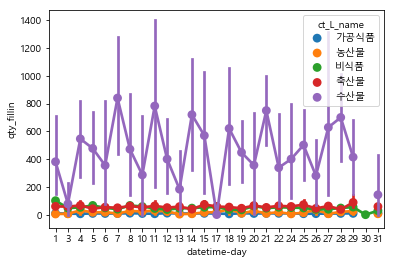

In [278]:
sns.pointplot(data=data, x="datetime-day", y="qty_fillin", hue="ct_L_name")

C:\Users\tkim29\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


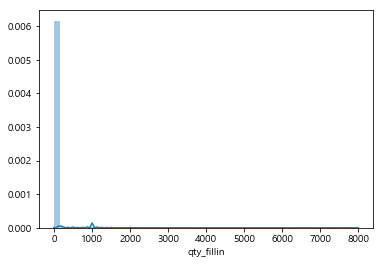

In [262]:
sns.distplot(data["qty_fillin"])

## EDA

In [110]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') #sns 한글화

C:\Users\tkim29\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


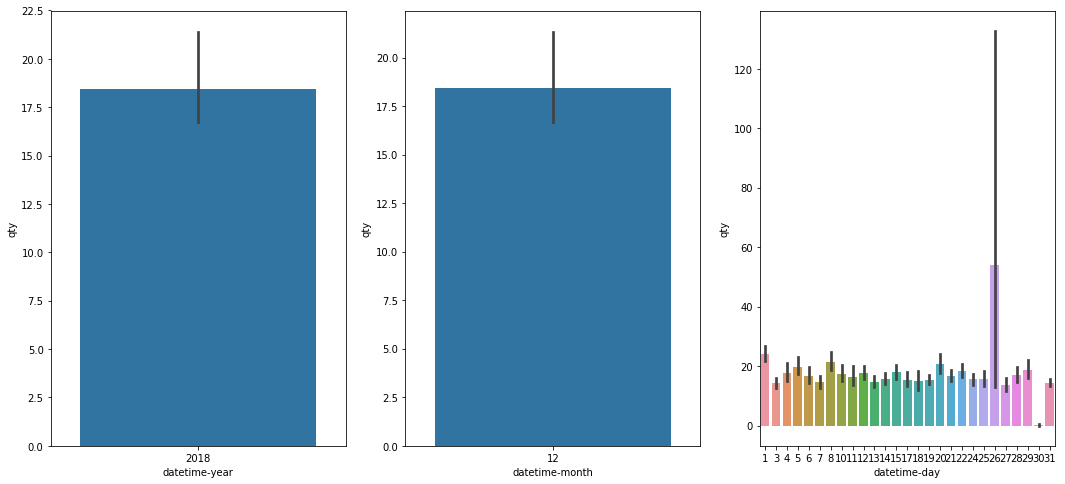

In [93]:
figure, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3)
# 시각화의 전체 사이즈는 18x8로 설정합니다.
figure.set_size_inches(18, 8)
sns.barplot(data=data, x="datetime-year", y="qty", ax=ax1)
sns.barplot(data=data, x="datetime-month", y="qty", ax=ax2)
sns.barplot(data=data, x="datetime-day", y="qty", ax=ax3)

C:\Users\tkim29\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


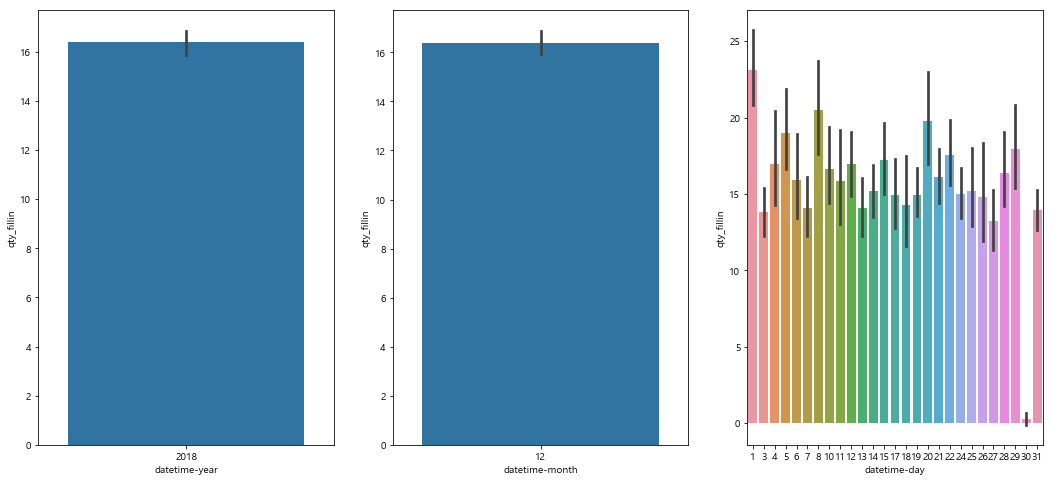

In [296]:
figure, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3)
# 시각화의 전체 사이즈는 18x8로 설정합니다.
figure.set_size_inches(18, 8)
sns.barplot(data=data, x="datetime-year", y="qty_fillin", ax=ax1)
sns.barplot(data=data, x="datetime-month", y="qty_fillin", ax=ax2)
sns.barplot(data=data, x="datetime-day", y="qty_fillin", ax=ax3)

<function matplotlib.pyplot.show(*args, **kw)>

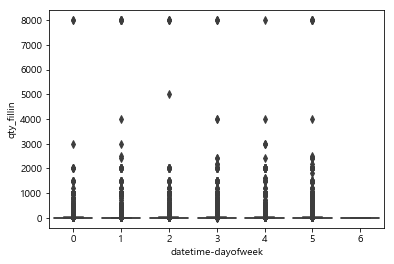

In [298]:
sns.boxplot(x="datetime-dayofweek", y="qty_fillin", data=data)
plt.show

In [300]:
#outlier 발견됨. 따라서 확대해서 시각화 수행
outlier = data[data["qty"] > 300000]

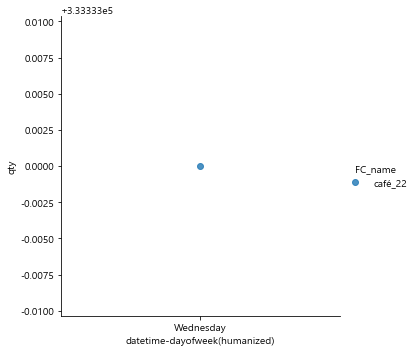

In [301]:
sns.lmplot(data=outlier, x="datetime-dayofweek(humanized)", y="qty", fit_reg=False, 
           hue="FC_name")

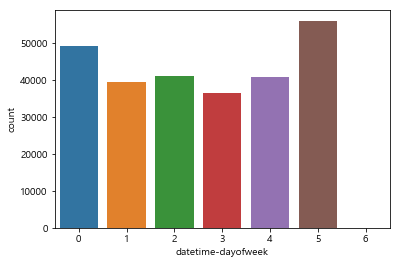

In [302]:
sns.countplot(data=data, x="datetime-dayofweek")

C:\Users\tkim29\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


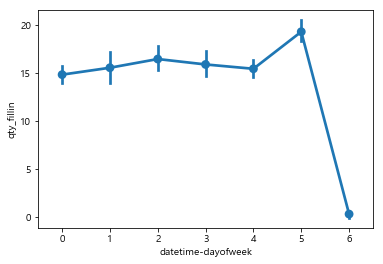

In [288]:
sns.pointplot(data = data, x="datetime-dayofweek", y="qty_fillin")

In [303]:
data.head()

,order_data,FC_code,FC_name,ST_code,ct_L_code,ct_L_name,ct_M_code,ct_M_name,ct_S_code,ct_S_name,sku_code,qty,std,datetime-year,datetime-month,datetime-day,datetime-dayofweek,datetime-dayofweek(humanized),qty_fillin,std_fillin
0,2018-12-07,10241,café_37,16444,10,가공식품,15,조미식품,11,조미료,120165,5.0,BOX,2018,12,7,4,Friday,5.0,BOX
1,2018-12-07,10241,café_37,16444,10,가공식품,10,유가공품,13,치즈류,100323,1.0,EA,2018,12,7,4,Friday,1.0,EA
2,2018-12-07,10241,café_37,16444,10,가공식품,19,캔/김치/편의식/기타,10,캔제품,100479,24.0,EA,2018,12,7,4,Friday,24.0,EA
3,2018-12-07,10241,café_37,16444,10,가공식품,13,분말가공,12,곡물가공기타,104176,12.0,EA,2018,12,7,4,Friday,12.0,EA
4,2018-12-07,10241,café_37,16444,10,가공식품,19,캔/김치/편의식/기타,13,가공식품기타,119183,4.0,EA,2018,12,7,4,Friday,4.0,EA


## K-Means Clustering Try!

In [356]:

feature = data[ ['ct_S_code','qty_fillin']]

feature.head()

from sklearn.cluster import KMeans

import matplotlib.pyplot  as plt

import seaborn as sns



# create model and prediction

model = KMeans(n_clusters=4,algorithm='auto')

model.fit(feature)

predict = pd.DataFrame(model.predict(feature))

predict.columns=['predict']



In [357]:
r = pd.concat([feature,predict],axis=1)
r.head()

,ct_S_code,qty_fillin,predict
0,11,5.0,0
1,13,1.0,0
2,10,24.0,0
3,12,12.0,0
4,13,4.0,0


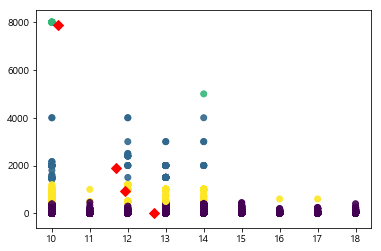

In [361]:
plt.scatter(r['ct_S_code'],r['qty_fillin'],c=r['predict'],alpha=0.9)

centers = pd.DataFrame(model.cluster_centers_,columns=['ct_S_code','qty_fillin'])

center_x = centers['ct_S_code']

center_y = centers['qty_fillin']

plt.scatter(center_x,center_y,s=50,marker='D',c='r')

plt.show()

In [353]:
##feature scaling
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans



scaler = StandardScaler()

model = KMeans(n_clusters=4)

pipeline = make_pipeline(scaler,model)

In [354]:
pipeline.fit(feature)

predict = pd.DataFrame(pipeline.predict(feature))

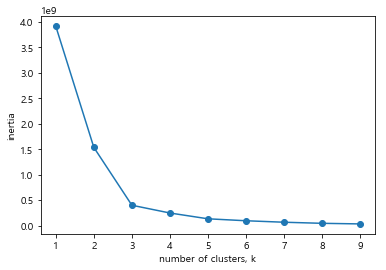

In [349]:
#inertia value를 이용한 적정 군집수 판단
ks = range(1,10)

inertias = []



for k in ks:

    model = KMeans(n_clusters=k)

    model.fit(feature)

    inertias.append(model.inertia_)

    

# Plot ks vs inertias

plt.plot(ks, inertias, '-o')

plt.xlabel('number of clusters, k')

plt.ylabel('inertia')

plt.xticks(ks)

plt.show()


## Hierarchy Clustering Try!

In [362]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt 

## recomm model 시뮬레이션 try!

In [371]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [384]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

#assigning predictor and target variables
x= data['ct_S_code'].reshape()
Y = data['qty_fillin'].reshape()
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(x, Y)


AttributeError: 'Series' object has no attribute 'reshape'

In [378]:
print(x)
print(Y)
#Predict Output 
predicted= model.predict([[1,2],[3,4]])


[[-3  7]
 [ 1  5]
 [ 1  2]
 [-2  0]
 [ 2  3]
 [-4  0]
 [-1  1]
 [ 1  1]
 [-2  2]
 [ 2  7]
 [-4  1]
 [-2  7]]
[3 3 3 3 4 3 3 4 3 4 4 4]


In [376]:
predicted

array([3, 4])

In [ ]:
model = NaiveBayesClassifier()
model.train(trainfile_path='kor_review.csv')